<div style="color: white; background-color: darkblue; font-size: 28px; font-weight: bold; text-align: center; padding: 20px;">
INSURANCE DATA ANALYSIS
</div>

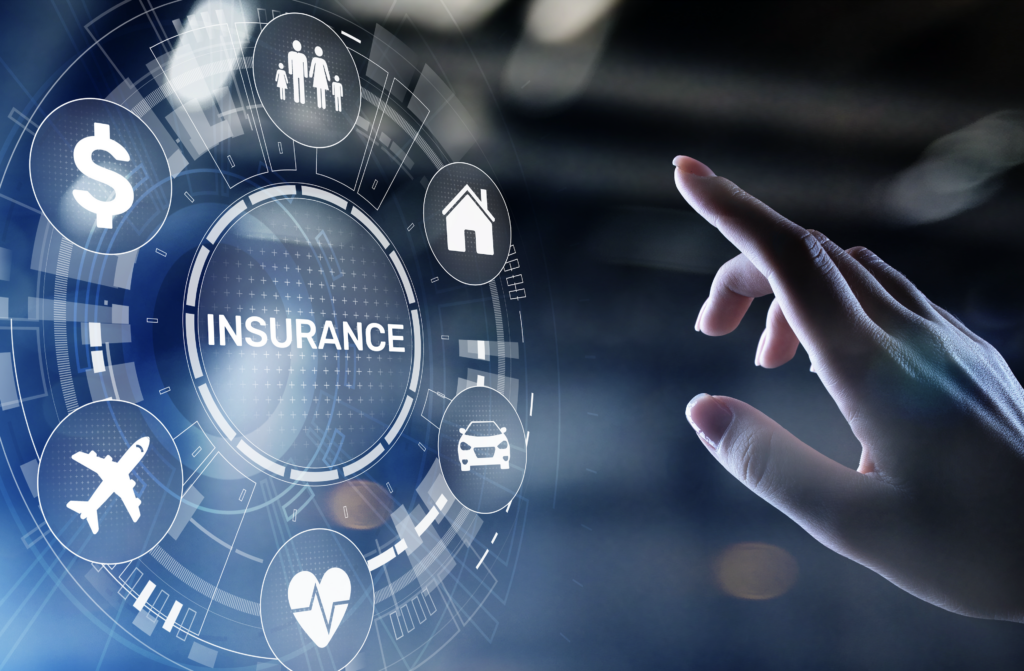!

# PROJECT PROCESS:

* IMPORT LIBARIES
* DATA LOADING
* DATA CLEANING AND PREPROCESSING
* EDA
* MEASURE OF CENTRAL TENDENCY
* Z-TEST
* T-TEST
* CHI-SQUARE TEST
* ANOVA
* F-TEST
* KRUSKAL–WALLIS H TEST

# IMPORT LIBARIES:

In [10]:
import pandas as pd
# Data loading, manipulation, and analysis.

import seaborn as sns
#Advanced and beautiful visualizations.

import numpy as np
#Numerical operations and array manipulations.

import matplotlib.pyplot as plt
#Plotting charts and customizing plots.

from statsmodels.stats.weightstats import ztest
#Performing Z-tests for hypothesis testing on means.

from scipy.stats import ttest_ind
#Performing independent T-tests to compare two groups.

from scipy.stats import chi2_contingency
#Performing Chi-square test of independence on categorical variables.

from scipy.stats import kruskal
#performing non-parametric alternative to one-way ANOVA

from sklearn.preprocessing import LabelEncoder
#Converting categorical text data to numeric labels. 

from sklearn.preprocessing import StandardScaler
#fix the encoding columns in a region

from sklearn.model_selection import train_test_split
#Splitting dataset into training and testing sets for ML models.

from sklearn.linear_model import LinearRegression
#Performing linear regression to predict numerical values.

from scipy import stats
# Other statistical operations like correlation, normality tests, etc.

# DATA LOADING:

In [12]:
data=pd.read_csv(r"C:\Users\GCE PMNA\Downloads\archive (30)\insurance.csv")
data.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


# COLUMN EXPLANATION:

# DATA CLEANING & PREPROCESSING:

In [15]:
data.shape

(1338, 7)

In [16]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [17]:
data.size

9366

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [19]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [20]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [21]:
data.duplicated().sum

<bound method Series.sum of 0       False
1       False
2       False
3       False
4       False
        ...  
1333    False
1334    False
1335    False
1336    False
1337    False
Length: 1338, dtype: bool>

# MEASURE OF CENTRAL TENDENCY:

In [23]:
data['charges'].mean()

13270.422265141257

In [24]:
data['charges'].median()

9382.033

In [25]:
data['charges'].mode()

0    1639.5631
Name: charges, dtype: float64

In [26]:
data['charges'].std()

12110.011236693994

In [27]:
data['charges'].var()

146652372.1528548

In [28]:
data['charges'].skew()

1.5158796580240388

# EXPLORATORY DATA ANALYSIS:

### COUNT PLOT:

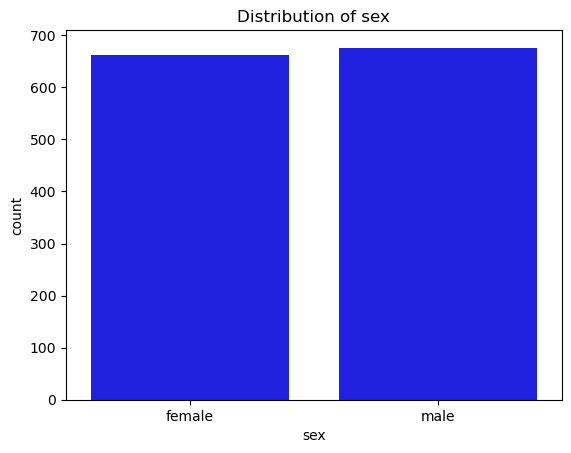

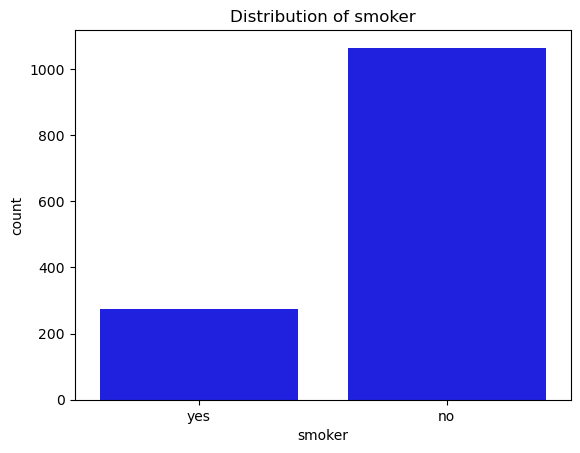

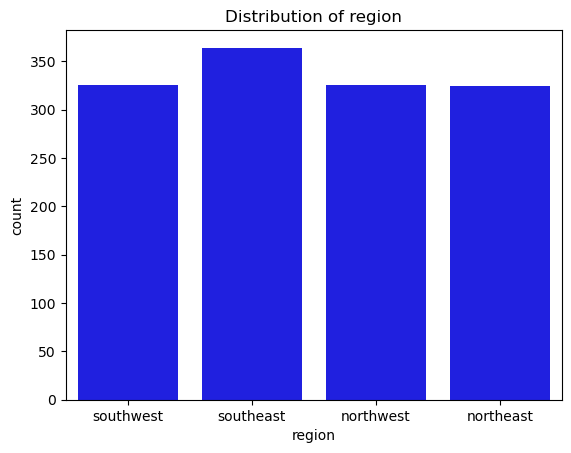

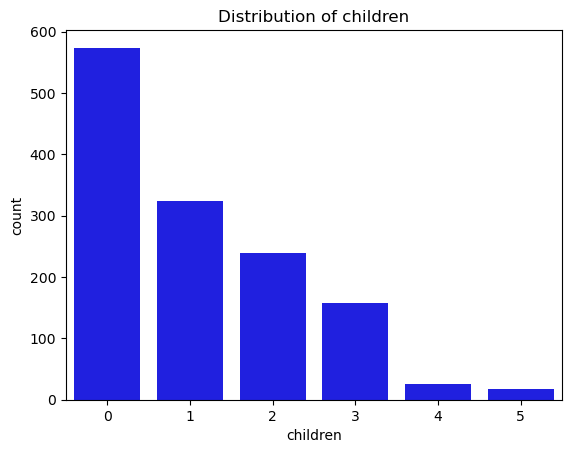

In [31]:
categorical = ['sex', 'smoker', 'region', 'children']

for col in categorical:
    sns.countplot(x=col,color='blue', data=data)
    plt.title(f"Distribution of {col}")
    plt.show()

### HIST PLOT:

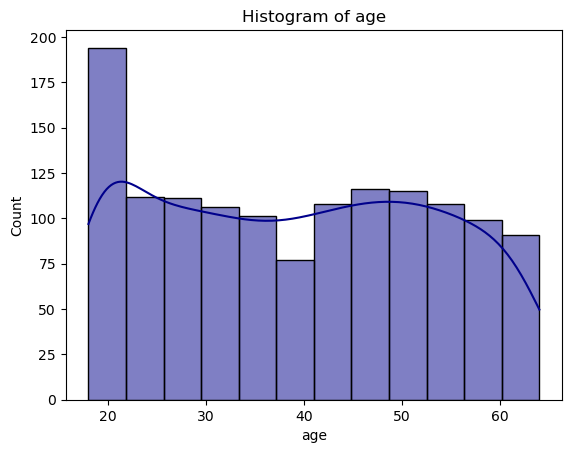

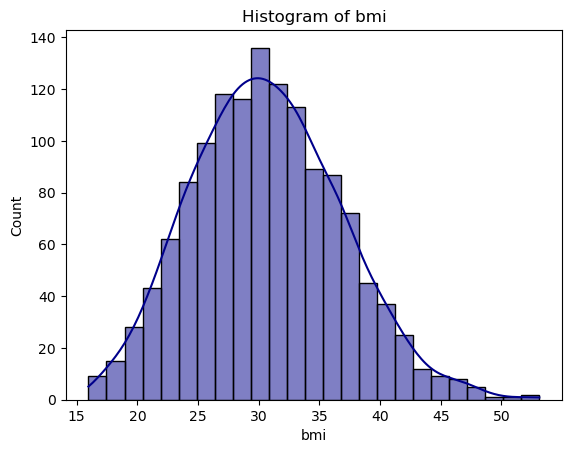

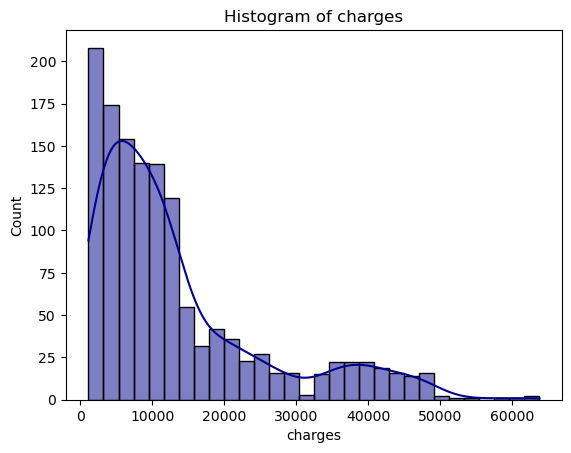

In [33]:
numerical = ['age', 'bmi', 'charges']

for col in numerical:
    sns.histplot(data[col], kde=True, color='darkblue')
    plt.title(f"Histogram of {col}")
    plt.show()

### SCATTER PLOT:

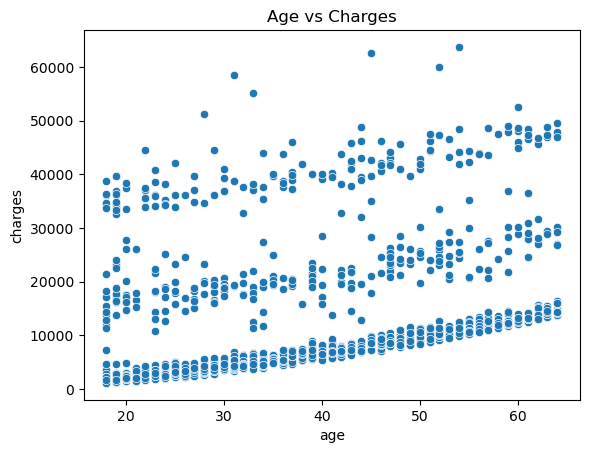

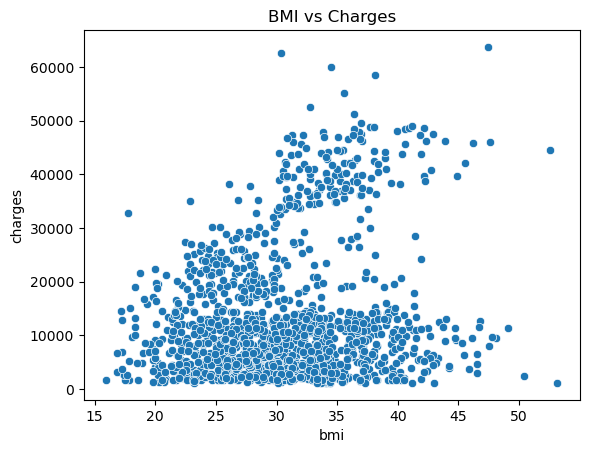

In [35]:
sns.scatterplot(x='age', y='charges', data=data)
plt.title("Age vs Charges")
plt.show()

sns.scatterplot(x='bmi', y='charges', data=data)
plt.title("BMI vs Charges")
plt.show()


### BOX PLOT:

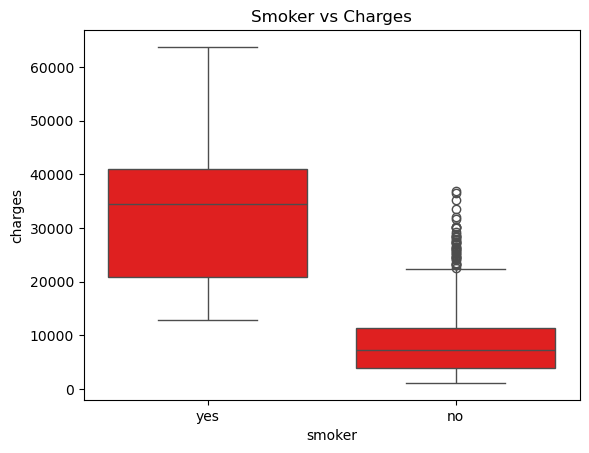

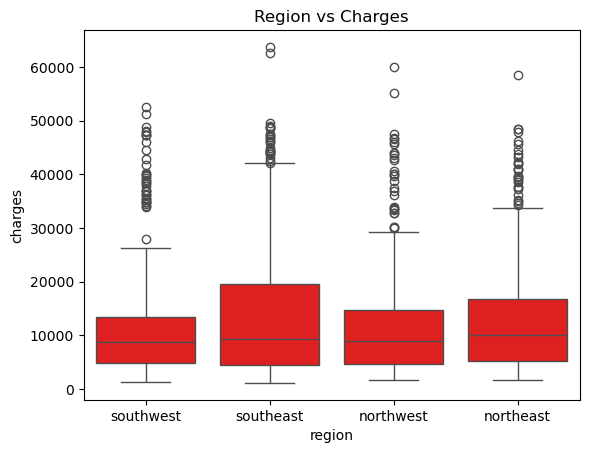

In [37]:
sns.boxplot(x='smoker', y='charges',color='red', data=data)
plt.title("Smoker vs Charges")
plt.show()

sns.boxplot(x='region', y='charges',color='red', data=data)
plt.title("Region vs Charges")
plt.show()

### HEAT MAP:

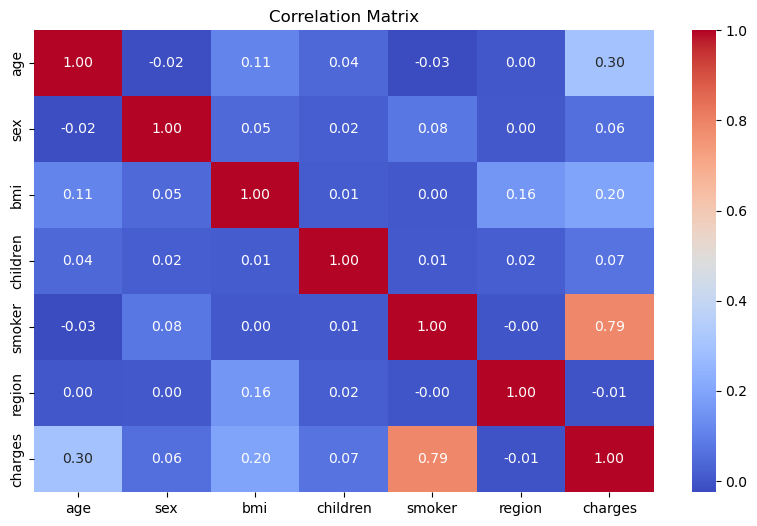

In [39]:
from sklearn.preprocessing import LabelEncoder
df = data.copy()
for col in df.select_dtypes(include='object').columns:
    df[col] = LabelEncoder().fit_transform(df[col])

# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

### PAIR PLOT:

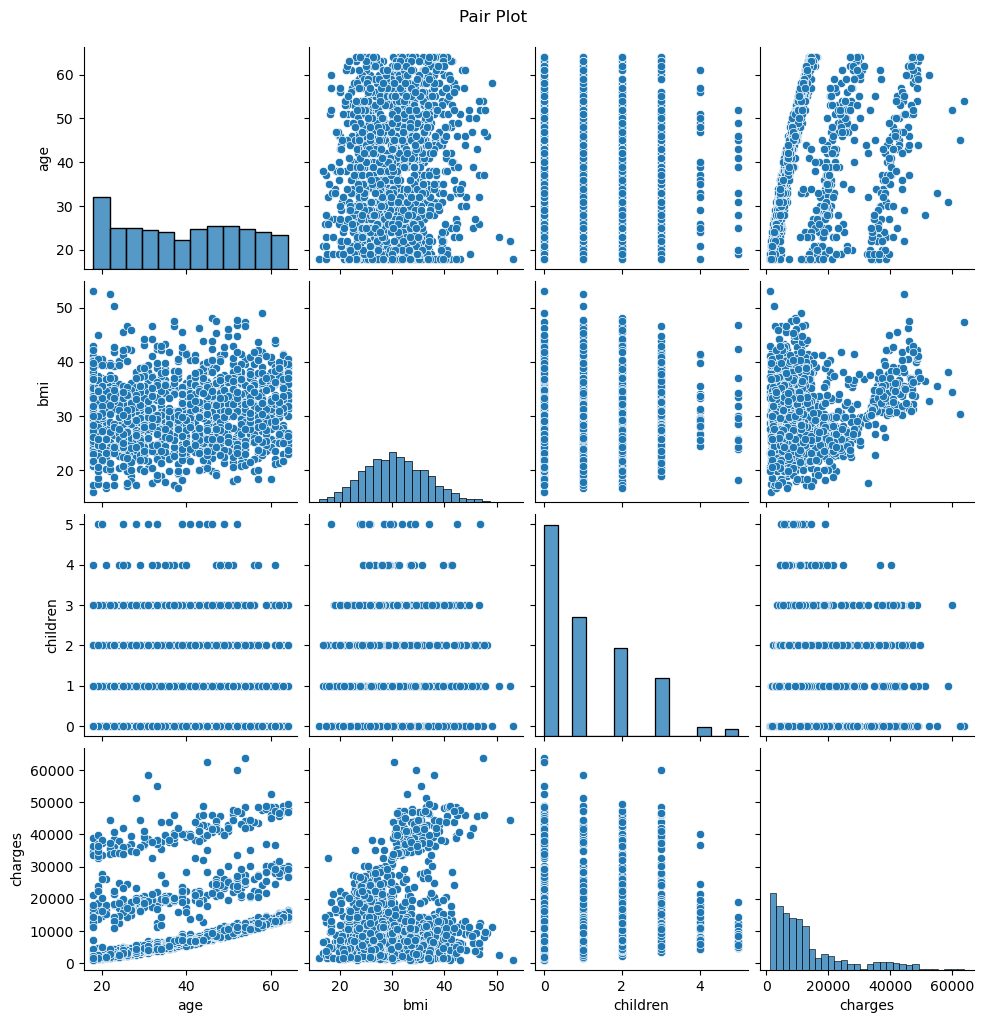

In [41]:
sns.pairplot(data)
plt.suptitle("Pair Plot", y=1.02)
plt.show()

### BOX PLOT:

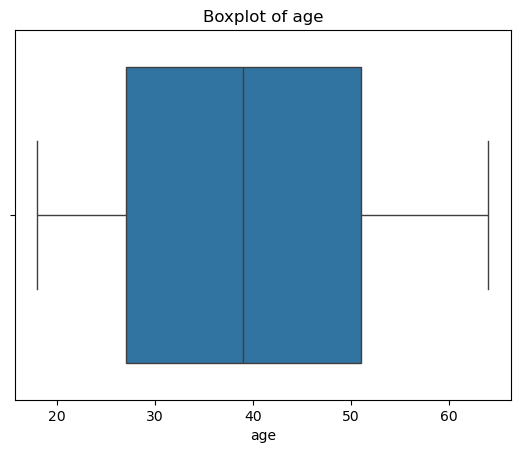

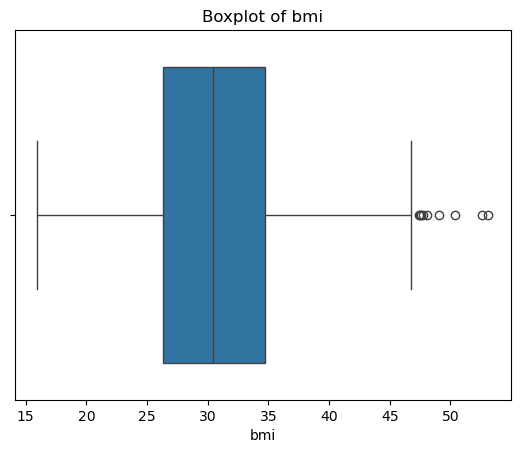

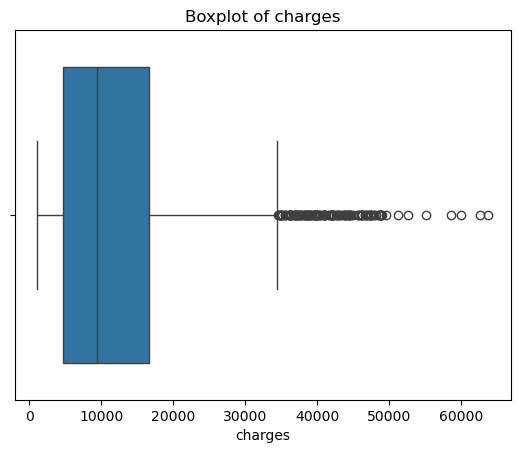

In [43]:
for col in ['age', 'bmi', 'charges']:
    sns.boxplot(x=data[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

# Z-TEST:


* Null Hypothesis (H0):This is the default assumption that there is no difference between the population means or that the mean difference is zero.

* Alternative Hypothesis (H1):This is the assumption that there is a difference between the population means.

In [46]:
z_stat,p_val=ztest(data['charges'],data['age'],value=0)

In [47]:
p_val

0.0

In [48]:
if p_val<0.05:
    print("null hypothesis rejected")

else:
    print("null hypothesis accepted")

null hypothesis rejected


* There is a significant relationship between age and charges in the dataset.

# T-TEST:

In [51]:
t_stat, p_val1 = ttest_ind(data['bmi'],data['age'])

In [52]:
p_val1

3.9973604269383935e-86

In [53]:
if p_val<0.05:
    print("null hypothesis rejected")

else:
    print("null hypothesis accepted")

null hypothesis rejected


* There is a significant relationship between age and bmi in the dataset.

# CHI SQUARE-TEST:  

In [56]:
categorical_cols = ['sex','smoker','region']

In [57]:
 for col in categorical_cols:
    contingency_table = pd.crosstab(data[col], data['charges'])
    chi2, p_val, dof, expected = chi2_contingency(contingency_table)
    
    print(f"Chi-square test between {col} and charges:")
    print(f"Chi2 Statistic: {chi2}")
    print(f"P-value: {p_val}")
    print(f"Degrees of Freedom: {dof}")
    print("Contingency Table:")
    print(contingency_table)
    print("\n")
    
    # Decision based on p-value
    if p_val < 0.05:
        print(f"There is a statistically significant association between {col} and charges.")
    else:
        print(f"There is no statistically significant association between {col} and charges.")
    print("\n")

Chi-square test between sex and charges:
Chi2 Statistic: 1337.9999999999998
P-value: 0.47943654572546
Degrees of Freedom: 1336
Contingency Table:
charges  1121.87390   1131.50660   1135.94070   1136.39940   1137.01100   \
sex                                                                        
female             0            0            0            0            0   
male               1            1            1            1            1   

charges  1137.46970   1141.44510   1146.79660   1149.39590   1163.46270   ...  \
sex                                                                       ...   
female             0            0            0            0            0  ...   
male               1            1            1            1            1  ...   

charges  48885.13561  48970.24760  49577.66240  51194.55914  52590.82939  \
sex                                                                        
female             1            0            0            0            0

# ANOVA:

In [59]:
# Extract the relevant columns


anova_data = data[['region', 'charges']]

In [60]:
#groupby

groups = anova_data.groupby('region')['charges'].apply(list)
groups

region
northeast    [6406.4107, 2721.3208, 10797.3362, 2395.17155,...
northwest    [21984.47061, 3866.8552, 7281.5056, 28923.1369...
southeast    [1725.5523, 4449.462, 3756.6216, 8240.5896, 27...
southwest    [16884.924, 1826.843, 1837.237, 10602.385, 368...
Name: charges, dtype: object

In [61]:
# perform oneway anova

f_statistic, p_value = stats.f_oneway(*groups)

In [62]:
# Print the results

print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")

F-statistic: 2.96962669358912
P-value: 0.0308933560705201


In [63]:
if p_value < 0.05:
    print("There are significant differences between the groups.")
else:
    print("There are no significant differences between the groups.")

There are significant differences between the groups.


# F-TEST:

In [65]:
data.shape

(1338, 7)

In [66]:
# Encoding 
object = data.select_dtypes(include=['object']).columns
le = LabelEncoder()
for col in object:
    data[col] = le.fit_transform(data[col].astype(str))
print(data.head())

   age  sex     bmi  children  smoker  region      charges
0   19    0  27.900         0       1       3  16884.92400
1   18    1  33.770         1       0       2   1725.55230
2   28    1  33.000         3       0       2   4449.46200
3   33    1  22.705         0       0       1  21984.47061
4   32    1  28.880         0       0       1   3866.85520


In [67]:
# Scaling
scaler = StandardScaler()
data['charges'] = scaler.fit_transform(data[['charges']])
print(data[['charges']].head())

    charges
0  0.298584
1 -0.953689
2 -0.728675
3  0.719843
4 -0.776802


In [68]:
# Define predictors and target
x = data.drop('charges', axis=1)
y = data['charges']

In [69]:
# Split the data

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [70]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [71]:
# Get predictions

y_pred = model.predict(x_test)


In [72]:
# Calculate the F-statistic

n = len(y_test)  # number of observations
p = x_train.shape[1]  # number of predictor variables

In [73]:
n

402

In [74]:
p

6

In [75]:
# Calculate the residual sum of squares

RSS = np.sum((y_test - y_pred) ** 2)

In [76]:
# Calculate the total sum of squares

TSS = np.sum((y_test - np.mean(y_test)) ** 2)

In [77]:
# Calculate the explained sum of squares

ESS = TSS - RSS

In [78]:
# Calculate the mean squared error

MSE = RSS / (n - p - 1)

In [79]:
# Calculate the mean squared regression

MSR = ESS / p

In [80]:
# Calculate the F-statistic

F_statistic = MSR / MSE

In [81]:
# Calculate the p-value

p_value = 1 - stats.f.cdf(F_statistic, p, n - p - 1)

In [82]:
print('F-statistic:', F_statistic)
print('p-value:', p_value)

F-statistic: 219.70530351767113
p-value: 1.1102230246251565e-16


In [83]:
# Check the significance

if p_value < 0.05:
    print('The model is significant at the 16% significance level.')
else:
    print('The model is not significant at the 16% significance level.')

The model is significant at the 16% significance level.


# Kruskal–Wallis H Test:

In [85]:
# Drop missing values for relevant columns
data = data.dropna(subset=['charges', 'region'])


In [86]:
# Group charges by region
grouped_charges = [group['charges'].values for name, group in data.groupby('region')]


In [87]:
# Apply Kruskal–Wallis H test
stat, p_value = kruskal(*grouped_charges)


In [88]:
# Output results
print("Kruskal–Wallis H Test Results")
print(f"Test Statistic: {stat}")
print(f"P-Value: {p_value}")

Kruskal–Wallis H Test Results
Test Statistic: 4.734181215658743
P-Value: 0.19232908072121002


In [89]:
if p_value < 0.05:
    print("There are significant differences between the groups.")
else:
    print("There are no significant differences between the groups.")

There are no significant differences between the groups.
